In [61]:
import pandas as pd
import requests
import urllib
import glob
from bs4 import BeautifulSoup
import sys
from astropy.io import fits
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from IPython.core.display import clear_output
from collections import defaultdict
from pysynphot import observation
from pysynphot import spectrum

In [2]:
fullData = fits.open('datafile1.fits')

In [3]:
fullData[1].data

FITS_rec([ ('spec-55859-F5902_sp01-034.fits', 331.91682200000002, -1.782592, 4898.85262831, 3.1456343104300002, -0.59728710158800002, 0.207304114215, 48.070824906600002, 0.0782952641354, 0.053381566810000003, 0.023729477632999998, 0.61569858229801511),
       ('spec-55859-F5902_sp01-136.fits', 332.22432900000001, -1.2657480000000001, 5278.9790052199996, 3.0767620381, -0.83812725376800001, 0.206289159227, 144.658427383, 0.28531117986499999, 0.17713386383499999, 0.074638180935400006, 0.5704184846180963),
       ('spec-55859-F5902_sp01-202.fits', 331.84534500000001, -2.02616, 4884.0788835800004, 3.2520881428899999, -0.382754544842, 0.22525132930399999, 36.263675136400003, 0.062663535426899994, 0.0395762383907, 0.016166318216200001, 0.81552484011148263),
       ...,
       ('spec-56812-VB231N08V2_sp16-158.fits', 230.10952, 9.7018009999999997, 4763.7925593600003, 2.66931423168, 0.37621637560999999, 0.030397022845999998, 6.83542213551, 0.017722609771799999, 0.00827234693356, 0.00445434289031

In [4]:
type(fullData[1].data)

astropy.io.fits.fitsrec.FITS_rec

In [5]:
fullDF = pd.DataFrame(np.array(fullData[1].data).byteswap().newbyteorder())

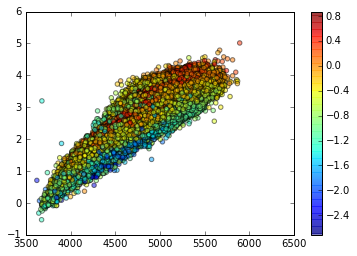

In [39]:
plt.scatter(fullDF['Teff'], fullDF['logg'], c=fullDF['FeH'], alpha=0.5)
plt.colorbar()

In [6]:
fullDF.tail()

,LAMOST_ID,RA,Dec,Teff,logg,FeH,alphaM,Teff_err,logg_err,FeH_err,alphaM_err,RedChisq
454175,b'spec-56812-VB231N08V2_sp16-149.fits ',230.33688,10.432679,4787.293208,2.469181,-0.114122,0.099078,23.041644,0.061304,0.028713,0.015194,0.484553
454176,b'spec-56812-VB231N08V2_sp16-154.fits ',230.13701,9.951401,4983.192360,2.884219,-0.513938,0.258236,61.264991,0.129729,0.068278,0.028534,0.293979
454177,b'spec-56812-VB231N08V2_sp16-158.fits ',230.10952,9.701801,4763.792559,2.669314,0.376216,0.030397,6.835422,0.017723,0.008272,0.004454,1.625752
454178,b'spec-56812-VB231N08V2_sp16-163.fits ',229.98739,9.903906,4902.434249,2.672862,-0.224880,0.098143,10.664426,0.025933,0.012930,0.007197,1.579433
454179,b'spec-56812-VB231N08V2_sp16-178.fits ',229.75631,9.942377,4657.241315,2.123999,-0.345835,0.113958,18.544621,0.052229,0.026007,0.014075,0.527676


In [7]:
#fullDF['Teff'] 

In [7]:
rcDF = fullDF.loc[(4300.<fullDF['Teff']) & (fullDF['Teff']< 5400.) & (fullDF['logg']< 3.2) & (fullDF['logg'] >  2.1)][:500]

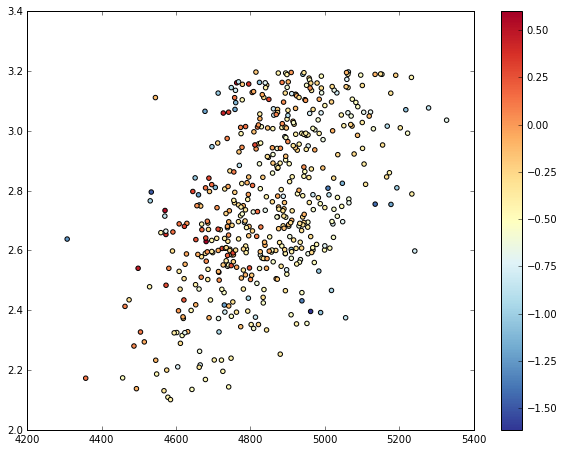

In [8]:
plt.figure(figsize=(10,7.5))
plt.scatter(rcDF['Teff'], rcDF['logg'], c=rcDF['FeH'], cmap=plt.cm.RdYlBu_r)
plt.colorbar()

In [9]:
modNames = [x.strip(' ')+'.gz' for x in rcDF['LAMOST_ID'].str.decode("utf-8")]

In [10]:
# def listFD(url, ext=''):
#     page = requests.get(url).text
#     soup = BeautifulSoup(page, 'html.parser')
#     return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

In [11]:
# names = pd.read_csv('lamost_spectra.dat',header=None)
# names.tail()

In [12]:
#modNames = [x.strip(' ')+'.gz' for x in list(names[0])]

In [13]:
modNames[:10],len(modNames)

(['spec-55859-F5902_sp01-034.fits.gz',
  'spec-55859-F5902_sp01-136.fits.gz',
  'spec-55859-F5902_sp01-231.fits.gz',
  'spec-55859-F5902_sp03-206.fits.gz',
  'spec-55859-F5902_sp03-209.fits.gz',
  'spec-55859-F5902_sp05-161.fits.gz',
  'spec-55859-F5902_sp07-039.fits.gz',
  'spec-55859-F5902_sp08-034.fits.gz',
  'spec-55859-F5902_sp10-123.fits.gz',
  'spec-55859-F5902_sp11-054.fits.gz'],
 500)

In [14]:
# url = 'http://dr2.lamost.org/sas/fits/'
# #folds = listFD(url, ext='')
# for _ in modNames:
#     nam = _.split('_')[0].split('-')[2]
#     item = url + nam +'/'
#     tf = urllib.request.URLopener()
#     try:
#         tf.retrieve(item + _ , 'lamost_spectra_rc/'+_)
#         #print(_)
        
#     except urllib.error.HTTPError as err:
#        if err.code == 404:
#            pass
#        else:
#                raise
            
#     except KeyboardInterrupt:
#         print('fucked')
#         sys.exit()
#     clear_output()   
#     print('{0} to go {1}'.format(len(modNames) - modNames.index(_), '...'*10))
#     sys.stdout.flush()

In [14]:
data,header = fits.getdata('lamost_spectra_rc/spec-55859-F5902_sp01-231.fits', header=True)

In [15]:
header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                 3908 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-55859-F5902_sp01-231.fits' /                                    
OBSID   =               101231 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR2'         / Data release version                           
EXTEN0  = 'Flux, Inverse, Wa

In [16]:
len(data)

5

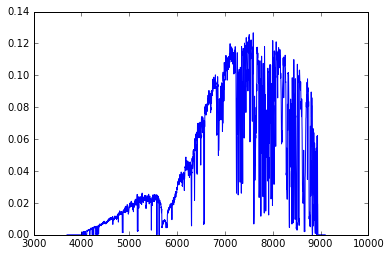

In [17]:
plt.plot(data[2], data[1])

In [18]:
data[1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [19]:
# def get_Data(file):
#     data,header = fits.getdata(file, header=True)

In [20]:
type(data[1])

numpy.ndarray

In [21]:
np.vstack([data[1],data[2]])[1]

array([ 3699.98632812,  3700.83837891,  3701.69067383, ...,  9092.8515625 ,
        9094.9453125 ,  9097.04003906], dtype=float32)

In [22]:
aa = np.empty(len(data[0]))

In [23]:
np.vstack([aa,data[1],data[2]])

array([[  0.00000000e+000,   2.15597802e-314,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  3.69998633e+003,   3.70083838e+003,   3.70169067e+003, ...,
          9.09285156e+003,   9.09494531e+003,   9.09704004e+003]])

In [24]:
dats = np.c_[modNames, rcDF['Teff'], rcDF['logg'], rcDF['FeH']]

In [30]:
np.savetxt('train_lamost.csv', dats, fmt='%s', delimiter=',')

In [50]:
aa = defaultdict(list)
for file in glob.glob('./lamost_spectra_rc/*'):
    data,header = fits.getdata(file, header=True)
    if len(data[2]) == 3909:
        aa['name'].append(file.split('/')[2])
        aa['wl'] = data[2]
        aa['flux'].append(data[0])
        aa['ivar'].append(data[1])

In [51]:
aa['wl']

array([ 3699.98632812,  3700.83837891,  3701.69067383, ...,  9094.9453125 ,
        9097.04003906,  9099.13476562], dtype=float32)

In [27]:
np.savez('paka', **aa)

In [124]:
old_paras = pd.read_csv('../uly_para',header=None)

In [125]:
old_paras = old_paras.loc[(old_paras[5] > 1.5) & (old_paras[5] < 3.2) &  (old_paras[4] <  6000.)]

In [168]:
old_paras.head()

,0,1,2,3,4,5,6,7,8,9
0,vnSt02801.dft,fm05t5000g35k2odfnew.dat,2801,vSt02801,4771.3797,2.287920,-0.798560,92.833625,0.263123,0.117240
1,vnSt01928.dft,fm05t4750g30k2odfnew.dat,1928,vSt01928,4771.0371,2.236376,-0.469346,92.356955,0.253954,0.116387
5,vnSt01889.dft,fm10t4750g20k2odfnew.dat,1889,vSt01889,4882.3268,2.376319,-0.689424,133.954080,0.363165,0.172333
6,vnSt02219.dft,fm05t5250g30k2odfnew.dat,2219,vSt02219,4817.6069,1.938312,-1.068723,110.347480,0.295241,0.154123
7,vnSt03096.dft,fm10t4750g25k2odfnew.dat,3096,vSt03096,4644.4902,2.221022,-0.989102,93.378646,0.277340,0.117433


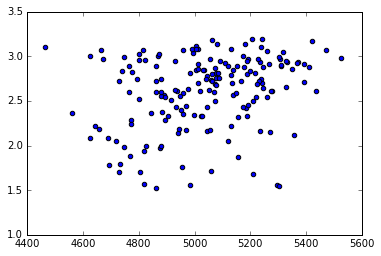

In [126]:
plt.scatter(old_paras[4],old_paras[5])

In [133]:
from shutil import copyfile

In [167]:
for i in old_paras[2]:
    for file in glob.glob('./canis_fits/*'):
        #print(file.split('/')[2][3:8])
        if i == int(file.split('/')[2][3:8]):
            #print(i, file.split('/')[2][3:8])
            copyfile(file, './canis_fits_rc/'+file.split('/')[2])

In [28]:
def wl_Cal(header, data):
    crval1 = header['CRVAL1']
    cdelt1 = header['CDELT1']
    start = crval1 - header['CRPIX1'] * cdelt1
    end = start + cdelt1 * data.shape[0] - cdelt1/10.
    x = np.arange(start, end, cdelt1)
    
    return x

In [62]:
def rebin_spec(wave, specin, wavnew):
    spec = spectrum.ArraySourceSpectrum(wave=wave, flux=specin)
    f = np.ones(len(wave))
    filt = spectrum.ArraySpectralElement(wave, f, waveunits='angstrom')
    obs = observation.Observation(spec, filt, binset=wavnew, force='taper')
 
    return obs.binflux

In [169]:
bb = defaultdict(list)
for file in glob.glob('./canis_fits_rc/*'):
    #print(file)
    data,header = fits.getdata(file, header=True)
    bb['name'].append(file.split('/')[2])
    bb['wl'] = wl_Cal(header, data)
    bb['flux'].append(data)
    iVar =  1/(data *0.03)
    bb['ivar'].append(iVar)

In [170]:
for i in bb['flux']:
    if len(i) != 4939:
        print('fucked')

In [171]:
bb['wl'],bb['flux'][0],aa['wl']

(array([ 3732.02271963,  3733.06026884,  3734.09781806, ...,  8853.3656597 ,
         8854.40320891,  8855.44075813]),
 array([  545.43914795,   395.16687012,   416.1003418 , ...,  7210.        ,
            0.        ,     0.        ], dtype=float32),
 array([ 3699.98632812,  3700.83837891,  3701.69067383, ...,  9094.9453125 ,
         9097.04003906,  9099.13476562], dtype=float32))

In [172]:
np.savez('canis_Test.npz', **bb)

In [63]:
fl_new = rebin_spec(aa['wl'],aa['flux'][0],bb['wl'])

In [175]:
len(bb['flux'])

174

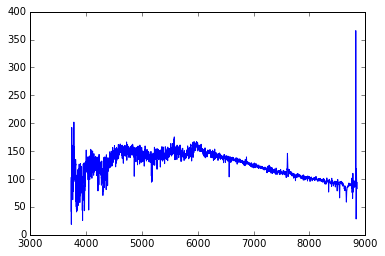

In [66]:
plt.plot(bb['wl'], fl_new)
#plt.plot(aa['wl'],aa['flux'][0])

In [71]:
cc = defaultdict(list)
for file in glob.glob('./lamost_spectra_rc/*'):
    data,header = fits.getdata(file, header=True)
    if len(data[2]) == 3909:
        cc['name'].append(file.split('/')[2])
        cc['wl'] = bb['wl']
        fl_new = rebin_spec(data[2],data[0],bb['wl'])
        cc['flux'].append(fl_new)
        iVar_new = rebin_spec(data[2],data[1],bb['wl'])
        cc['ivar'].append(iVar_new)
        clear_output()
        sys.stdout.flush()

In [173]:
cc['wl'],bb['wl']

(array([ 3732.01096808,  3733.04851404,  3734.08605999, ...,  8853.33778186,
         8854.37532782,  8855.41287377]),
 array([ 3732.02271963,  3733.06026884,  3734.09781806, ...,  8853.3656597 ,
         8854.40320891,  8855.44075813]))

In [75]:
np.savez('canis_Train.npz', **cc)

In [174]:
len(cc['name'])

311

In [81]:
rcDF['name'] = modNames

In [102]:
names = pd.DataFrame(cc['name'])

In [107]:
tDF = pd.read_csv('train_lamost.csv',header=None)
#tDF[0].str[:-3]
tDF = tDF.merge(names, left_on=tDF[0].str[:-3], right_on=[0])
tDF[['0_y',1,2,3]].to_csv('lamost_labels.csv',index=None,header=None)